Objective:
- Build a machine learning model to accurately predict the prices of used cars based on various features. 
- Deploy this model as an interactive and user-friendly Streamlit web application. 
- The tool will serve as a seamless solution for both customers and sales representatives to estimate car prices, 
  aiding in decision-making and improving overall satisfaction.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Importing the required dataset and concatenating:

In [2]:
df_b=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Dataset-20241106T053909Z-001\Dataset\processed_data.csv")
df_b

,city,mileage kmpl,engine cc,max_power bhp,torque Nm,seats,engine_and_transmission_engine_type,engine_and_transmission_displacement,engine_and_transmission_max_power,engine_and_transmission_max_torque,...,feature_top,feature_comfort_convenience,feature_interior,feature_exterior,feature_safety,car_links,specs_top_wheel_size,specs_miscellaneous_alloy_wheel_size,feature_entertainment_communication,8
0,bangalore,23.1 kmpl,998 CC,67.04bhp,90Nm,5.0,K10B Engine,998.0,67.04bhp@6000rpm,90Nm@3500rpm,...,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Digital Odometer, Ele...","Adjustable Head Lights, Manually Adjustable Ex...","Centeral Locking, Child Safety Locks, Day Nigh...",https://www.cardekho.com/used-car-details/used...,NaN,NaN,NaN,NaN
1,bangalore,17 kmpl,1497 CC,121.31bhp,150Nm,5.0,Ti-VCT Petrol Engine,1497.0,121.31bhp@6500rpm,150Nm@4500rpm,...,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",https://www.cardekho.com/buy-used-car-details/...,16,16,"Cd Player, Radio, Speakers Front, Speakers Rea...",NaN
2,bangalore,23.84 kmpl,1199 CC,84bhp,114Nm,5.0,Revotron Engine,1199.0,84bhp@6000rpm,114Nm@3500rpm,...,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",https://www.cardekho.com/used-car-details/used...,14,14,"Cd Player, Radio, Speakers Front, Speakers Rea...",NaN
3,bangalore,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5.0,Kappa VTVT Petrol Engine,1197.0,81.86bhp@6000rpm,113.75Nm@4000rpm,...,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",https://www.cardekho.com/buy-used-car-details/...,14,14,"Cd Player, Radio, Speakers Front, Speakers Rea...",NaN
4,bangalore,23.65 kmpl,1248 CC,88.5bhp,200Nm,5.0,DDiS 200 Diesel Engine,1248.0,88.5bhp@4000rpm,200Nm@1750rpm,...,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",https://www.cardekho.com/used-car-details/used...,16,16,"Radio, Audio System Remote Control, Speakers F...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,bangalore,12.55 kmpl,2982 CC,168.5bhp,343Nm,7.0,D-4D Diesel Engine,2982.0,168.5bhp@3600rpm,343Nm@1400-3400rpm,...,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Brake Assist, Center...",https://www.cardekho.com/used-car-details/used...,17,17,"Cd Player, Dvd Player, Radio, Audio System Rem...",NaN
1477,bangalore,15 kmpl,1586 CC,104.68,145,5.0,In-Line Engine,1586.0,"104.68@5,600 (PS@rpm)","145@4,100 (kgm@rpm)",...,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Fog Lights Front, Fog Lights Rear, Power Adjus...","Anti Lock Braking System, Brake Assist, Center...",https://www.cardekho.com/used-car-details/used...,16,16,"Cd Player, Radio, Audio System Remote Control,...",NaN
1478,bangalore,19.4 kmpl,1198 CC,86.8bhp,109Nm,5.0,i-VTEC Engine,1198.0,86.8bhp@6000rpm,109Nm@4500rpm,...,"Power Steering, Power Windows Front, Air Condi...","Power Stee

In [3]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 68 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city                                         1481 non-null   object 
 1   mileage kmpl                                 1439 non-null   object 
 2   engine cc                                    1478 non-null   object 
 3   max_power bhp                                1465 non-null   object 
 4   torque Nm                                    1465 non-null   object 
 5   seats                                        1480 non-null   float64
 6   engine_and_transmission_engine_type          1423 non-null   object 
 7   engine_and_transmission_displacement         1478 non-null   float64
 8   engine_and_transmission_max_power            1465 non-null   object 
 9   engine_and_transmission_max_torque           1465 non-null   object 
 10  

In [4]:
print(df_b.columns)

Index(['city', 'mileage kmpl', 'engine cc', 'max_power bhp', 'torque Nm',
       'seats', 'engine_and_transmission_engine_type',
       'engine_and_transmission_displacement',
       'engine_and_transmission_max_power',
       'engine_and_transmission_max_torque',
       'engine_and_transmission_no_of_cylinder',
       'engine_and_transmission_values_per_cylinder',
       'engine_and_transmission_value_configuration',
       'engine_and_transmission_fuel_suppy_system',
       'engine_and_transmission_turbo_charger',
       'engine_and_transmission_super_charger', 'dimensions_capacity_length',
       'dimensions_capacity_width', 'dimensions_capacity_height',
       'dimensions_capacity_wheel_base', 'dimensions_capacity_front_tread',
       'dimensions_capacity_rear_tread',
       'specs_dimensions_capacity_kerb_weight',
       'specs_dimensions_capacity_gross_weight',
       'specs_miscellaneous_gear_box', 'specs_miscellaneous_drive_type',
       'specs_miscellaneous_seating_capacity',


In [5]:
columns_to_drop = [
      'car_links',
     'specs_miscellaneous_alloy_wheel_size',
     'specs_miscellaneous_no_door_numbers',
     'engine_and_transmission_values_per_cylinder',
     'engine_and_transmission_value_configuration',
     'engine_and_transmission_fuel_suppy_system',
     'engine_and_transmission_super_charger',
     'specs_miscellaneous_seating_capacity',
     'specs_miscellaneous_steering_type',
     'specs_miscellaneous_front_brake_type',
     'specs_miscellaneous_rear_brake_type',
     'engine_and_transmission_max_power',
     'engine_and_transmission_max_torque',
      'dimensions_capacity_front_tread',
     'dimensions_capacity_rear_tread',
     'specs_dimensions_capacity_kerb_weight',
     'specs_dimensions_capacity_gross_weight',
     'specs_miscellaneous_gear_box',
      'specs_miscellaneous_top_speed',
     'specs_miscellaneous_acceleration',
      'specs_miscellaneous_tyre_type',
     'specs_miscellaneous_cargo_volumn',
     'detail_centralVariantId'
]

In [6]:
def drop_columns(df_b,columns_to_drop):
    return df_b.drop(columns=columns_to_drop,errors='ignore')

In [7]:
print(df_b.columns)
df_b = drop_columns(df_b, columns_to_drop)
print(df_b.columns)

Index(['city', 'mileage kmpl', 'engine cc', 'max_power bhp', 'torque Nm',
       'seats', 'engine_and_transmission_engine_type',
       'engine_and_transmission_displacement',
       'engine_and_transmission_max_power',
       'engine_and_transmission_max_torque',
       'engine_and_transmission_no_of_cylinder',
       'engine_and_transmission_values_per_cylinder',
       'engine_and_transmission_value_configuration',
       'engine_and_transmission_fuel_suppy_system',
       'engine_and_transmission_turbo_charger',
       'engine_and_transmission_super_charger', 'dimensions_capacity_length',
       'dimensions_capacity_width', 'dimensions_capacity_height',
       'dimensions_capacity_wheel_base', 'dimensions_capacity_front_tread',
       'dimensions_capacity_rear_tread',
       'specs_dimensions_capacity_kerb_weight',
       'specs_dimensions_capacity_gross_weight',
       'specs_miscellaneous_gear_box', 'specs_miscellaneous_drive_type',
       'specs_miscellaneous_seating_capacity',


In [8]:
df_b=df_b.drop([ '8', 'specs_miscellaneous_drive_type','engine_and_transmission_no_of_cylinder','specs_miscellaneous_turning_radius'],axis=1)

In [9]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1481 non-null   object 
 1   mileage kmpl                           1439 non-null   object 
 2   engine cc                              1478 non-null   object 
 3   max_power bhp                          1465 non-null   object 
 4   torque Nm                              1465 non-null   object 
 5   seats                                  1480 non-null   float64
 6   engine_and_transmission_engine_type    1423 non-null   object 
 7   engine_and_transmission_displacement   1478 non-null   float64
 8   engine_and_transmission_turbo_charger  1288 non-null   object 
 9   dimensions_capacity_length             1460 non-null   object 
 10  dimensions_capacity_width              1460 non-null   object 
 11  dime

In [10]:
df_c=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Dataset-20241106T053909Z-001\Dataset\processed_car_data_chennai.csv")

In [11]:
def drop_columns(df_c,columns_to_drop):
    return df_c.drop(columns=columns_to_drop,errors='ignore')

In [12]:
df_c = drop_columns(df_c, columns_to_drop)

In [13]:
df_c=df_c.drop(['specs_dimensions_capacity_ground_clearance_unladen','specs_engine_and_transmission_borex_stroke','specs_dimensions_capacity_rear_tread','specs_dimensions_capacity_front_tread','specs_engine_and_transmission_super_charger','specs_engine_and_transmission_value_configuration','specs_engine_and_transmission_color','specs_engine_and_transmission_engine_type','specs_engine_and_transmission_displacement','specs_engine_and_transmission_no_of_cylinder','specs_engine_and_transmission_values_per_cylinder','specs_engine_and_transmission_fuel_suppy_system','specs_miscellaneous_drive_type', 'detail_priceFixedText', 'detail_trendingText', 'overview_engine_displacement','specs_engine_and_transmission_max_power','specs_engine_and_transmission_max_torque']
,axis=1)

In [14]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   city                                         1419 non-null   object
 1   specs_top_engine                             1419 non-null   object
 2   specs_top_max_power                          1408 non-null   object
 3   specs_top_torque                             1408 non-null   object
 4   specs_top_wheel_size                         951 non-null    object
 5   specs_top_seats                              1419 non-null   int64 
 6   specs_engine_and_transmission_turbo_charger  1275 non-null   object
 7   specs_dimensions_capacity_length             1405 non-null   object
 8   specs_dimensions_capacity_width              1404 non-null   object
 9   specs_dimensions_capacity_height             1405 non-null   object
 10  specs_dimens

In [15]:
df_d=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Dataset-20241106T053909Z-001\Dataset\processed_car_data_delhi.csv")

In [16]:
def drop_columns(df_d,columns_to_drop):
    return df_d.drop(columns=columns_to_drop,errors='ignore')

In [17]:
df_d = drop_columns(df_d, columns_to_drop)

In [18]:
df_d=df_d.drop(['specs_dimensions_capacity_ground_clearance_unladen','specs_engine_and_transmission_borex_stroke','specs_dimensions_capacity_rear_tread','specs_dimensions_capacity_front_tread','specs_engine_and_transmission_super_charger','specs_engine_and_transmission_value_configuration','specs_engine_and_transmission_color','specs_engine_and_transmission_engine_type','specs_engine_and_transmission_displacement','specs_engine_and_transmission_no_of_cylinder','specs_engine_and_transmission_values_per_cylinder','specs_engine_and_transmission_fuel_suppy_system','specs_miscellaneous_drive_type', 'detail_priceFixedText', 'detail_trendingText', 'overview_engine_displacement','specs_engine_and_transmission_max_power','specs_engine_and_transmission_max_torque']
,axis=1)

In [19]:
print(df_d.columns)

Index(['file_name', 'row_index', 'source_city', 'city', 'specs_top_mileage',
       'specs_top_engine', 'specs_top_max_power', 'specs_top_torque',
       'specs_top_wheel_size', 'specs_top_seats',
       'specs_engine_and_transmission_turbo_charger',
       'specs_engine_and_transmission_json',
       'specs_dimensions_capacity_length', 'specs_dimensions_capacity_width',
       'specs_dimensions_capacity_height',
       'specs_dimensions_capacity_wheel_base',
       'specs_dimensions_capacity_json', 'specs_miscellaneous_json',
       'detail_ft', 'detail_bt', 'detail_km', 'detail_transmission',
       'detail_ownerNo', 'detail_owner', 'detail_oem', 'detail_model',
       'detail_modelYear', 'detail_variantName', 'detail_price',
       'overview_registration_year', 'overview_insurance_validity',
       'overview_fuel_type', 'overview_seats', 'overview_kms_driven',
       'overview_ownership', 'overview_transmission',
       'overview_year_of_manufacture', 'feature_top',
       'feature_

In [20]:
df_d=df_d.drop(['specs_engine_and_transmission_compression_ratio','specs_engine_and_transmission_json', 'specs_miscellaneous_json','file_name', 'row_index', 'source_city'],axis=1)

In [21]:
df_d=df_d.drop(['specs_dimensions_capacity_json','specs_miscellaneous_turning_radius', 'overview_seats'],axis=1)

In [22]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city                                         1485 non-null   object 
 1   specs_top_mileage                            1401 non-null   object 
 2   specs_top_engine                             1485 non-null   object 
 3   specs_top_max_power                          1482 non-null   object 
 4   specs_top_torque                             1482 non-null   object 
 5   specs_top_wheel_size                         965 non-null    object 
 6   specs_top_seats                              1484 non-null   float64
 7   specs_engine_and_transmission_turbo_charger  1301 non-null   object 
 8   specs_dimensions_capacity_length             1477 non-null   object 
 9   specs_dimensions_capacity_width              1474 non-null   object 
 10  

In [23]:
df_h=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Dataset-20241106T053909Z-001\Dataset\processed_car_data_hyderabad.csv")

In [24]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 79 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   file_name                                           1483 non-null   object 
 1   row_index                                           1483 non-null   int64  
 2   source_city                                         1483 non-null   object 
 3   city                                                1483 non-null   object 
 4   specs_top_mileage                                   1441 non-null   object 
 5   specs_top_engine                                    1482 non-null   object 
 6   specs_top_max_power                                 1472 non-null   object 
 7   specs_top_torque                                    1472 non-null   object 
 8   specs_top_wheel_size                                913 non-null    object 
 9

In [25]:
def drop_columns(df_h,columns_to_drop):
    return df_h.drop(columns=columns_to_drop,errors='ignore')
df_h= drop_columns(df_h, columns_to_drop)

In [26]:
df_h=df_h.drop(['specs_dimensions_capacity_ground_clearance_unladen','specs_engine_and_transmission_borex_stroke','specs_dimensions_capacity_rear_tread','specs_dimensions_capacity_front_tread','specs_engine_and_transmission_super_charger','specs_engine_and_transmission_value_configuration','specs_engine_and_transmission_color','specs_engine_and_transmission_engine_type','specs_engine_and_transmission_displacement','specs_engine_and_transmission_no_of_cylinder','specs_engine_and_transmission_values_per_cylinder','specs_engine_and_transmission_fuel_suppy_system','specs_miscellaneous_drive_type', 'detail_priceFixedText', 'detail_trendingText', 'overview_engine_displacement','specs_engine_and_transmission_max_power','specs_engine_and_transmission_max_torque']
,axis=1)

In [27]:
df_h=df_h.drop(['specs_engine_and_transmission_compression_ratio','specs_engine_and_transmission_json', 'specs_miscellaneous_json','file_name', 'row_index', 'source_city'],axis=1)

In [28]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city                                         1483 non-null   object 
 1   specs_top_mileage                            1441 non-null   object 
 2   specs_top_engine                             1482 non-null   object 
 3   specs_top_max_power                          1472 non-null   object 
 4   specs_top_torque                             1472 non-null   object 
 5   specs_top_wheel_size                         913 non-null    object 
 6   specs_top_seats                              1483 non-null   int64  
 7   specs_engine_and_transmission_turbo_charger  1266 non-null   object 
 8   specs_dimensions_capacity_length             1472 non-null   object 
 9   specs_dimensions_capacity_width              1472 non-null   object 
 10  

In [29]:
df_j=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Dataset-20241106T053909Z-001\Dataset\processed_car_data_jaipur.csv")

In [30]:
def drop_columns(df_j,columns_to_drop):
    return df_j.drop(columns=columns_to_drop,errors='ignore')
df_j = drop_columns(df_j, columns_to_drop)

In [31]:
df_j=df_j.drop(['specs_dimensions_capacity_ground_clearance_unladen','specs_engine_and_transmission_borex_stroke','specs_dimensions_capacity_rear_tread','specs_dimensions_capacity_front_tread','specs_engine_and_transmission_super_charger','specs_engine_and_transmission_value_configuration','specs_engine_and_transmission_color','specs_engine_and_transmission_engine_type','specs_engine_and_transmission_displacement','specs_engine_and_transmission_no_of_cylinder','specs_engine_and_transmission_values_per_cylinder','specs_engine_and_transmission_fuel_suppy_system','specs_miscellaneous_drive_type', 'detail_priceFixedText', 'detail_trendingText', 'overview_engine_displacement','specs_engine_and_transmission_max_power','specs_engine_and_transmission_max_torque']
,axis=1)

In [32]:
df_j=df_j.drop(['specs_engine_and_transmission_compression_ratio','specs_engine_and_transmission_json', 'specs_miscellaneous_json','file_name', 'row_index', 'source_city'],axis=1)

In [33]:
df_j=df_j.drop(['specs_dimensions_capacity_json', 'specs_miscellaneous_turning_radius'],axis=1)

In [34]:
df_k=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Dataset-20241106T053909Z-001\Dataset\processed_car_data_kolkata.csv")

In [35]:
def drop_columns(df_k,columns_to_drop):
    return df_k.drop(columns=columns_to_drop,errors='ignore')
df_k = drop_columns(df_k, columns_to_drop)

In [36]:
df_k=df_k.drop(['specs_dimensions_capacity_ground_clearance_unladen','specs_engine_and_transmission_borex_stroke','specs_dimensions_capacity_rear_tread','specs_dimensions_capacity_front_tread','specs_engine_and_transmission_super_charger','specs_engine_and_transmission_value_configuration','specs_engine_and_transmission_color','specs_engine_and_transmission_engine_type','specs_engine_and_transmission_displacement','specs_engine_and_transmission_no_of_cylinder','specs_engine_and_transmission_values_per_cylinder','specs_engine_and_transmission_fuel_suppy_system','specs_miscellaneous_drive_type', 'detail_priceFixedText', 'detail_trendingText', 'overview_engine_displacement','specs_engine_and_transmission_max_power','specs_engine_and_transmission_max_torque']
,axis=1)

In [37]:
df_k=df_k.drop(['specs_engine_and_transmission_compression_ratio','specs_engine_and_transmission_json', 'specs_miscellaneous_json','file_name', 'row_index', 'source_city'],axis=1)

In [38]:
df_k=df_k.drop(['specs_dimensions_capacity_json', 'specs_miscellaneous_turning_radius'],axis=1)

In [39]:
new_names = {
    'city': 'city',
    'specs_top_mileage': 'mileage',
    'specs_top_engine': 'engine',
    'specs_top_max_power': 'max_power',
    'specs_top_torque': 'torque',
    'specs_top_wheel_size': 'wheel_size',
    'specs_top_seats': 'seats',
    'specs_engine_and_transmission_turbo_charger': 'turbo_charger',
    'specs_dimensions_capacity_length': 'length',
    'specs_dimensions_capacity_width': 'width',
    'specs_dimensions_capacity_height': 'height',
    'specs_dimensions_capacity_wheel_base': 'wheelbase',
    'detail_ft': 'fuel_type',
    'detail_bt': 'body_type',
    'detail_km': 'kilometers',
    'detail_transmission': 'transmission',
    'detail_ownerNo': 'owner_number',
    'detail_owner': 'owner',
    'detail_oem': 'manufacturer',
    'detail_model': 'model',
    'detail_modelYear': 'model_year',
    'detail_variantName': 'variant',
    'detail_price': 'price',
    'overview_registration_year': 'reg_year',
    'overview_insurance_validity': 'insurance_valid_till',
    'overview_fuel_type': 'fuel_type',
    'overview_seats': 'seat_count',
    'overview_kms_driven': 'kilometers_driven',
    'overview_rto': 'rto',
    'overview_ownership': 'ownership_type',
    'overview_transmission': 'transmission_type',
    'overview_year_of_manufacture': 'manufacture_year',
    'feature_top': 'top_features',
    'feature_comfort_convenience': 'comfort_features',
    'feature_interior': 'interior_features',
    'feature_exterior': 'exterior_features',
    'feature_safety': 'safety_features',
    'feature_entertainment_communication': 'entertainment_features'
}

df_k = df_k.rename(columns=new_names)
df_k.columns = list(new_names.values())

In [40]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    1381 non-null   object 
 1   mileage                 1334 non-null   object 
 2   engine                  1381 non-null   object 
 3   max_power               1371 non-null   object 
 4   torque                  1371 non-null   object 
 5   wheel_size              837 non-null    object 
 6   seats                   1378 non-null   float64
 7   turbo_charger           1204 non-null   object 
 8   length                  1369 non-null   object 
 9   width                   1369 non-null   object 
 10  height                  1369 non-null   object 
 11  wheelbase               1361 non-null   object 
 12  fuel_type               1381 non-null   object 
 13  body_type               1380 non-null   object 
 14  kilometers              1381 non-null   

In [41]:
new_names = {
    'city': 'city',
    'specs_top_mileage': 'mileage',
    'specs_top_engine': 'engine',
    'specs_top_max_power': 'max_power',
    'specs_top_torque': 'torque',
    'specs_top_wheel_size': 'wheel_size',
    'specs_top_seats': 'seats',
    'specs_engine_and_transmission_turbo_charger': 'turbo_charger',
    'specs_dimensions_capacity_length': 'length',
    'specs_dimensions_capacity_width': 'width',
    'specs_dimensions_capacity_height': 'height',
    'specs_dimensions_capacity_wheel_base': 'wheelbase',
    'detail_ft': 'fuel_type',
    'detail_bt': 'body_type',
    'detail_km': 'kilometers',
    'detail_transmission': 'transmission',
    'detail_ownerNo': 'owner_number',
    'detail_owner': 'owner',
    'detail_oem': 'manufacturer',
    'detail_model': 'model',
    'detail_modelYear': 'model_year',
    'detail_variantName': 'variant',
    'detail_price': 'price',
    'overview_registration_year': 'reg_year',
    'overview_insurance_validity': 'insurance_valid_till',
    'overview_fuel_type': 'fuel_type',
    'overview_seats': 'seat_count',
    'overview_kms_driven': 'kilometers_driven',
    'overview_rto': 'rto',
    'overview_ownership': 'ownership_type',
    'overview_transmission': 'transmission_type',
    'overview_year_of_manufacture': 'manufacture_year',
    'feature_top': 'top_features',
    'feature_comfort_convenience': 'comfort_features',
    'feature_interior': 'interior_features',
    'feature_exterior': 'exterior_features',
    'feature_safety': 'safety_features',
    'feature_entertainment_communication': 'entertainment_features'
}
df_j = df_j.rename(columns=new_names)
df_j.columns = list(new_names.values())

In [42]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    1120 non-null   object 
 1   mileage                 1092 non-null   object 
 2   engine                  1120 non-null   object 
 3   max_power               1111 non-null   object 
 4   torque                  1111 non-null   object 
 5   wheel_size              691 non-null    object 
 6   seats                   1119 non-null   float64
 7   turbo_charger           995 non-null    object 
 8   length                  1107 non-null   object 
 9   width                   1107 non-null   object 
 10  height                  1107 non-null   object 
 11  wheelbase               1091 non-null   object 
 12  fuel_type               1120 non-null   object 
 13  body_type               1120 non-null   object 
 14  kilometers              1120 non-null   

In [43]:
new_names = {
    'city': 'city',
    'specs_top_mileage': 'mileage',
    'specs_top_engine': 'engine',
    'specs_top_max_power': 'max_power',
    'specs_top_torque': 'torque',
    'specs_top_wheel_size': 'wheel_size',
    'specs_top_seats': 'seats',
    'specs_engine_and_transmission_turbo_charger': 'turbo_charger',
    'specs_dimensions_capacity_length': 'length',
    'specs_dimensions_capacity_width': 'width',
    'specs_dimensions_capacity_height': 'height',
    'specs_dimensions_capacity_wheel_base': 'wheelbase',
    'detail_ft': 'fuel_type',
    'detail_bt': 'body_type',
    'detail_km': 'kilometers',
    'detail_transmission': 'transmission',
    'detail_ownerNo': 'owner_number',
    'detail_owner': 'owner',
    'detail_oem': 'manufacturer',
    'detail_model': 'model',
    'detail_modelYear': 'model_year',
    'detail_variantName': 'variant',
    'detail_price': 'price',
    'overview_registration_year': 'reg_year',
    'overview_insurance_validity': 'insurance_valid_till',
    'overview_fuel_type': 'fuel_type',
    'overview_seats': 'seat_count',
    'overview_kms_driven': 'kilometers_driven',
    'overview_rto': 'rto',
    'overview_ownership': 'ownership_type',
    'overview_transmission': 'transmission_type',
    'overview_year_of_manufacture': 'manufacture_year',
    'feature_top': 'top_features',
    'feature_comfort_convenience': 'comfort_features',
    'feature_interior': 'interior_features',
    'feature_exterior': 'exterior_features',
    'feature_safety': 'safety_features',
    'feature_entertainment_communication': 'entertainment_features'
}
df_h = df_h.rename(columns=new_names)
df_h.columns = list(new_names.values())

ValueError: Length mismatch: Expected axis has 40 elements, new values have 38 elements

In [44]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city                                1483 non-null   object 
 1   mileage                             1441 non-null   object 
 2   engine                              1482 non-null   object 
 3   max_power                           1472 non-null   object 
 4   torque                              1472 non-null   object 
 5   wheel_size                          913 non-null    object 
 6   seats                               1483 non-null   int64  
 7   turbo_charger                       1266 non-null   object 
 8   length                              1472 non-null   object 
 9   width                               1472 non-null   object 
 10  height                              1472 non-null   object 
 11  wheelbase                           1459 no

In [45]:
new_names = {
    'city': 'city',
    'specs_top_mileage': 'mileage',
    'specs_top_engine': 'engine',
    'specs_top_max_power': 'max_power',
    'specs_top_torque': 'torque',
    'specs_top_wheel_size': 'wheel_size',
    'specs_top_seats': 'seats',
    'specs_engine_and_transmission_turbo_charger': 'turbo_charger',
    'specs_dimensions_capacity_length': 'length',
    'specs_dimensions_capacity_width': 'width',
    'specs_dimensions_capacity_height': 'height',
    'specs_dimensions_capacity_wheel_base': 'wheelbase',
    'detail_ft': 'fuel_type',
    'detail_bt': 'body_type',
    'detail_km': 'kilometers',
    'detail_transmission': 'transmission',
    'detail_ownerNo': 'owner_number',
    'detail_owner': 'owner',
    'detail_oem': 'manufacturer',
    'detail_model': 'model',
    'detail_modelYear': 'model_year',
    'detail_variantName': 'variant',
    'detail_price': 'price',
    'overview_registration_year': 'reg_year',
    'overview_insurance_validity': 'insurance_valid_till',
    'overview_fuel_type': 'fuel_type',
    'overview_kms_driven': 'kilometers_driven',
    'overview_ownership': 'ownership_type',
    'overview_transmission': 'transmission_type',
    'overview_year_of_manufacture': 'manufacture_year',
    'feature_top': 'top_features',
    'feature_comfort_convenience': 'comfort_features',
    'feature_interior': 'interior_features',
    'feature_exterior': 'exterior_features',
    'feature_safety': 'safety_features',
    'feature_entertainment_communication': 'entertainment_features',
    'overview_rto': 'rto'
}
df_d = df_d.rename(columns=new_names)
df_d.columns = list(new_names.values())

In [46]:
new_names = {
    'city': 'city',
    'specs_top_mileage': 'mileage',
    'specs_top_engine': 'engine',
    'specs_top_max_power': 'max_power',
    'specs_top_torque': 'torque',
    'specs_top_wheel_size': 'wheel_size',
    'specs_top_seats': 'seats',
    'specs_engine_and_transmission_turbo_charger': 'turbo_charger',
    'specs_dimensions_capacity_length': 'length',
    'specs_dimensions_capacity_width': 'width',
    'specs_dimensions_capacity_height': 'height',
    'specs_dimensions_capacity_wheel_base': 'wheelbase',
    'detail_ft': 'fuel_type',
    'detail_bt': 'body_type',
    'detail_km': 'kilometers',
    'detail_transmission': 'transmission',
    'detail_ownerNo': 'owner_number',
    'detail_owner': 'owner',
    'detail_oem': 'manufacturer',
    'detail_model': 'model',
    'detail_modelYear': 'model_year',
    'detail_variantName': 'variant',
    'detail_price': 'price',
    'overview_registration_year': 'reg_year',
    'overview_insurance_validity': 'insurance_valid_till',
    'overview_fuel_type': 'fuel_type',
    'overview_kms_driven': 'kilometers_driven',
    'overview_ownership': 'ownership_type',
    'overview_transmission': 'transmission_type',
    'overview_year_of_manufacture': 'manufacture_year',
    'feature_top': 'top_features',
    'feature_comfort_convenience': 'comfort_features',
    'feature_interior': 'interior_features',
    'feature_exterior': 'exterior_features',
    'feature_safety': 'safety_features',
    'feature_entertainment_communication': 'entertainment_features',
    'overview_rto': 'rto'
}
df_c = df_c.rename(columns=new_names)
df_c.columns = list(new_names.values())

ValueError: Length mismatch: Expected axis has 39 elements, new values have 37 elements

In [47]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   city                                1419 non-null   object
 1   engine                              1419 non-null   object
 2   max_power                           1408 non-null   object
 3   torque                              1408 non-null   object
 4   wheel_size                          951 non-null    object
 5   seats                               1419 non-null   int64 
 6   turbo_charger                       1275 non-null   object
 7   length                              1405 non-null   object
 8   width                               1404 non-null   object
 9   height                              1405 non-null   object
 10  wheelbase                           1388 non-null   object
 11  fuel_type                           1419 non-null   obje

In [48]:
new_names = {
    'city': 'city',
    'mileage kmpl': 'mileage',
    'engine cc': 'engine',
    'max_power bhp': 'max_power',
    'torque Nm': 'torque',
    'seats': 'seats',
    'engine_and_transmission_engine_type': 'engine_type',
    'engine_and_transmission_displacement': 'displacement',
    'engine_and_transmission_turbo_charger': 'turbo_charger',
    'dimensions_capacity_length': 'length',
    'dimensions_capacity_width': 'width',
    'dimensions_capacity_height': 'height',
    'dimensions_capacity_wheel_base': 'wheelbase',
    'detail_ft': 'fuel_type',
    'detail_bt': 'body_type',
    'detail_km': 'kilometers',
    'detail_transmission': 'transmission',
    'detail_ownerNo': 'owner_number',
    'detail_owner': 'owner',
    'detail_oem': 'manufacturer',
    'detail_model': 'model',
    'detail_modelYear': 'model_year',
    'detail_variantName': 'variant',
    'detail_price': 'price',
    'overview_registration_year': 'reg_year',
    'overview_insurance_validity': 'insurance_valid_till',
    'overview_fuel_type': 'fuel_type_overview',
    'overview_seats': 'seat_count',
    'overview_kms_driven': 'kilometers_driven',
    'overview_rto': 'rto',
    'overview_ownership': 'ownership_type',
    'overview_engine_displacement': 'displacement_overview',
    'overview_transmission': 'transmission_type',
    'overview_year_of_manufacture': 'manufacture_year',
    'feature_top': 'top_features',
    'feature_comfort_convenience': 'comfort_features',
    'feature_interior': 'interior_features',
    'feature_exterior': 'exterior_features',
    'feature_safety': 'safety_features',
    'specs_top_wheel_size': 'wheel_size',
    'feature_entertainment_communication': 'entertainment_features'
}
df_b = df_b.rename(columns=new_names)
df_b.columns = list(new_names.values())

In [49]:
print("Duplicate columns in df_b:", df_b.columns[df_b.columns.duplicated()].tolist())
print("Duplicate columns in df_c:", df_c.columns[df_c.columns.duplicated()].tolist())
print("Duplicate columns in df_h:", df_h.columns[df_h.columns.duplicated()].tolist())
print("Duplicate columns in df_j:", df_j.columns[df_j.columns.duplicated()].tolist())
print("Duplicate columns in df_d:", df_d.columns[df_d.columns.duplicated()].tolist())
print("Duplicate columns in df_k:", df_k.columns[df_k.columns.duplicated()].tolist())

# Function to make column names unique by adding suffixes
def make_columns_unique(df, suffix=''):
    if suffix:
        return df.add_suffix(suffix)
    
    # If columns are duplicated, add numeric suffix
    if any(df.columns.duplicated()):
        new_cols = []
        seen = {}
        for col in df.columns:
            if col in seen:
                seen[col] += 1
                new_cols.append(f"{col}_{seen[col]}")
            else:
                seen[col] = 0
                new_cols.append(col)
        df.columns = new_cols
    return df

# Fix duplicate columns in each dataframe
df_b = make_columns_unique(df_b)
df_c = make_columns_unique(df_c)
df_h = make_columns_unique(df_h)
df_j = make_columns_unique(df_j)
df_d = make_columns_unique(df_d)
df_k = make_columns_unique(df_k)

# Now try concatenating
df_combined = pd.concat([df_b, df_c, df_h, df_j, df_d, df_k], axis=0, ignore_index=True) 

Duplicate columns in df_b: []
Duplicate columns in df_c: ['fuel_type']
Duplicate columns in df_h: ['fuel_type']
Duplicate columns in df_j: ['fuel_type']
Duplicate columns in df_d: ['fuel_type']
Duplicate columns in df_k: ['fuel_type']


Handling Missing Values and Standardising Data Formats:

In [50]:
df_combined = df_combined.reset_index(drop=True)

In [51]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city                                8369 non-null   object 
 1   mileage                             8082 non-null   object 
 2   engine                              8365 non-null   object 
 3   max_power                           8309 non-null   object 
 4   torque                              8309 non-null   object 
 5   seats                               8363 non-null   float64
 6   engine_type                         1423 non-null   object 
 7   displacement                        1478 non-null   float64
 8   turbo_charger                       7329 non-null   object 
 9   length                              8290 non-null   object 
 10  width                               8286 non-null   object 
 11  height                              8290 no

In [52]:
df_combined.isnull().sum()

city                                     0
mileage                                287
engine                                   4
max_power                               60
torque                                  60
seats                                    6
engine_type                           6946
displacement                          6891
turbo_charger                         1040
length                                  79
width                                   83
height                                  79
wheelbase                              163
fuel_type                                0
body_type                                4
kilometers                               0
transmission                             0
owner_number                             0
owner                                    0
manufacturer                             0
model                                    0
model_year                               0
variant                                  0
price      

In [53]:
df_combined=df_combined.drop([ 'specs_miscellaneous_turning_radius','overview_seats', 'fuel_type_1','engine_type', 'displacement', 'displacement_overview', 'owner', 'variant', 'reg_year','fuel_type_overview', 'seat_count', 'rto', 'kilometers_driven','ownership_type', 'transmission_type','manufacture_year'],axis=1)

In [54]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            8369 non-null   object 
 1   mileage                         8082 non-null   object 
 2   engine                          8365 non-null   object 
 3   max_power                       8309 non-null   object 
 4   torque                          8309 non-null   object 
 5   seats                           8363 non-null   float64
 6   turbo_charger                   7329 non-null   object 
 7   length                          8290 non-null   object 
 8   width                           8286 non-null   object 
 9   height                          8290 non-null   object 
 10  wheelbase                       8206 non-null   object 
 11  fuel_type                       8369 non-null   object 
 12  body_type                       83

In [55]:
df_combined.isnull().sum()

city                                 0
mileage                            287
engine                               4
max_power                           60
torque                              60
seats                                6
turbo_charger                     1040
length                              79
width                               83
height                              79
wheelbase                          163
fuel_type                            0
body_type                            4
kilometers                           0
transmission                         0
owner_number                         0
manufacturer                         0
model                                0
model_year                           0
price                                0
insurance_valid_till                 4
top_features                        65
comfort_features                    68
interior_features                   77
exterior_features                   90
safety_features          

In [56]:
df_combined.duplicated().sum()

np.int64(110)

In [57]:
df_combined.drop_duplicates(inplace=True)

In [58]:
df_combined.shape

(8259, 29)

In [59]:
import re
df_combined['mileage'] = df_combined['mileage'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)
df_combined[ 'max_power'] = df_combined[ 'max_power'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)
df_combined[ 'engine'] = df_combined[ 'engine'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)
df_combined[ 'torque'] = df_combined[ 'torque'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)
df_combined[ 'length'] = df_combined[ 'length'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)
df_combined[ 'width'] = df_combined[ 'width'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)
df_combined['height'] = df_combined['height'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)
df_combined[ 'wheelbase'] = df_combined[ 'wheelbase'].str.replace(r'[^\d.]+', '', regex=True).replace('', np.nan).fillna(0).astype(float)

In [60]:
df_combined

,city,mileage,engine,max_power,torque,seats,turbo_charger,length,width,height,...,price,insurance_valid_till,top_features,comfort_features,interior_features,exterior_features,safety_features,wheel_size,entertainment_features,specs_dimensions_capacity_json
0,bangalore,23.10,998.0,67.04,90.00,5.0,No,3715.0,1635.0,1565.0,...,₹ 4 Lakh,Third Party insurance,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Digital Odometer, Ele...","Adjustable Head Lights, Manually Adjustable Ex...","Centeral Locking, Child Safety Locks, Day Nigh...",NaN,NaN,NaN
1,bangalore,17.00,1497.0,121.31,150.00,5.0,No,3998.0,1765.0,1647.0,...,₹ 8.11 Lakh,Comprehensive,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",16,"Cd Player, Radio, Speakers Front, Speakers Rea...",NaN
2,bangalore,23.84,1199.0,84.00,114.00,5.0,No,3746.0,1647.0,1535.0,...,₹ 5.85 Lakh,Comprehensive,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",14,"Cd Player, Radio, Speakers Front, Speakers Rea...",NaN
3,bangalore,19.10,1197.0,81.86,113.75,5.0,No,3995.0,1660.0,1520.0,...,₹ 4.62 Lakh,Comprehensive,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",14,"Cd Player, Radio, Speakers Front, Speakers Rea...",NaN
4,bangalore,23.65,1248.0,88.50,200.00,5.0,Yes,4300.0,1785.0,1595.0,...,₹ 7.90 Lakh,Third Party insurance,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Powe...","Anti Lock Braking System, Centeral Locking, Po...",16,"Radio, Audio System Remote Control, Speakers F...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,25.24,998.0,65.71,89.00,5.0,NaN,3695.0,1655.0,1555.0,...,₹ 5.10 Lakh,Third Party insurance,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Power Adjustable Exter...","Anti Lock Braking System, Centeral Locking, Po...",NaN,"Radio, Speakers Front, Speakers Rear, Integrat...",NaN
8365,Kolkata,22.74,796.0,47.30,69.00,5.0,No,3395.0,1490.0,1475.0,...,₹ 1.80 Lakh,Third Party insurance,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Remote Tr...","Air Conditioner, Heater, Digital Odometer, Ele...","Adjustable Head Lights, Manually Adjustable Ex...","Day Night Rear View Mirror, Passenger Side Rea...",NaN,NaN,NaN
8366,Kolkata,11.74,1796.0,186.00,285.00,5.0,No,4591.0,1770.0,1447.0,...,₹ 5.50 Lakh,Third Party insurance,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Fog ...","Anti Lock Braking System, Brake Assist, Center...",17,"Cd Player, Cd Changer, Radio, Audio System Rem...",NaN
8367,Kolkata,18.50,1197.0,85.80,114.00,5.0,No,3775.0,1680.0,1620.0,...,₹ 1.40 Lakh,Third Party insurance,"Power Steering, Power Windows Front, Air Condi...","Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Fog ...","Anti Lock Braking System, Centeral Locking, Po...",14,"Cd Player, Radio, Spea

In [61]:
df_combined['price'] = (df_combined['price'].str.replace(r'[^\d.]', '', regex=True).replace('', np.nan).fillna(0).astype(float)* 100000                               
)

In [62]:
top_premium_features = [
    'Power Steering',
    'Power Windows Front',
    'Air Conditioner',
    'Heater',
    'Adjustable Head Lights',
    'Central Locking',
    'Child Safety Locks',
    'Anti Lock Braking System',
    'Driver Airbag',
    'Passenger Airbag'
]

comfort_premium_features = [
    'Power Windows Rear',
    'Remote Trunk Opener',
    'Remote Fuel Lid Opener',
    'Low Fuel Warning Light',
    'Accessory Power Outlet',
    'Vanity Mirror',
    'Rear Seat Headrest',
    'Cup Holders Front',
    'Cup Holders Rear',
    'Automatic Climate Control'
]

interior_premium_features = [
    'Air Conditioner',
    'Heater',
    'Digital Odometer',
    'Electronic Multi Tripmeter',
    'Leather Upholstery',
    'Fabric Upholstery',
    'Glove Compartment',
    'Digital Clock',
    'Touch Screen',
    'Navigation System'
]

exterior_premium_features = [
    'Adjustable Head Lights',
    'Power Adjustable Exterior Rear View Mirror',
    'Electric Folding Rear View Mirror',
    'Rain Sensing Wiper',
    'Alloy Wheels',
    'Power Antenna',
    'Chrome Grille',
    'LED Headlights',
    'LED DRLs',
    'Fog Lights'
]

# Process top features
df_combined['top_features_count'] = df_combined['top_features'].fillna('').apply(
    lambda x: sum(1 for feature in top_premium_features if feature in str(x))
)
df_combined['top_features_percentage'] = (df_combined['top_features_count'] / len(top_premium_features)) * 100
df_combined['top_features_rating'] = pd.cut(
    df_combined['top_features_percentage'],
    bins=[0, 25, 50, 75, 100],
    labels=['Basic', 'Standard', 'Premium', 'Luxury']
)

# Process comfort features
df_combined['comfort_features_count'] = df_combined['comfort_features'].fillna('').apply(
    lambda x: sum(1 for feature in comfort_premium_features if feature in str(x))
)
df_combined['comfort_features_percentage'] = (df_combined['comfort_features_count'] / len(comfort_premium_features)) * 100
df_combined['comfort_features_rating'] = pd.cut(
    df_combined['comfort_features_percentage'],
    bins=[0, 25, 50, 75, 100],
    labels=['Basic', 'Standard', 'Premium', 'Luxury']
)

# Process interior features
df_combined['interior_features_count'] = df_combined['interior_features'].fillna('').apply(
    lambda x: sum(1 for feature in interior_premium_features if feature in str(x))
)
df_combined['interior_features_percentage'] = (df_combined['interior_features_count'] / len(interior_premium_features)) * 100
df_combined['interior_features_rating'] = pd.cut(
    df_combined['interior_features_percentage'],
    bins=[0, 25, 50, 75, 100],
    labels=['Basic', 'Standard', 'Premium', 'Luxury']
)

# Process exterior features
df_combined['exterior_features_count'] = df_combined['exterior_features'].fillna('').apply(
    lambda x: sum(1 for feature in exterior_premium_features if feature in str(x))
)
df_combined['exterior_features_percentage'] = (df_combined['exterior_features_count'] / len(exterior_premium_features)) * 100
df_combined['exterior_features_rating'] = pd.cut(
    df_combined['exterior_features_percentage'],
    bins=[0, 25, 50, 75, 100],
    labels=['Basic', 'Standard', 'Premium', 'Luxury']
)

# Calculate overall premium score and rating
percentage_columns = [col for col in df_combined.columns if 'percentage' in col]
df_combined['overall_premium_score'] = df_combined[percentage_columns].mean(axis=1)
df_combined['overall_premium_rating'] = pd.cut(
    df_combined['overall_premium_score'],
    bins=[0, 25, 50, 75, 100],
    labels=['Basic', 'Standard', 'Premium', 'Luxury']
)
print(df_combined['overall_premium_rating'].value_counts().sort_index()) 

overall_premium_rating
Basic         71
Standard    1470
Premium     6653
Luxury         0
Name: count, dtype: int64


In [63]:
df_combined.isnull().sum()

city                                 0
mileage                              0
engine                               0
max_power                            0
torque                               0
seats                                6
turbo_charger                     1026
length                               0
width                                0
height                               0
wheelbase                            0
fuel_type                            0
body_type                            4
kilometers                           0
transmission                         0
owner_number                         0
manufacturer                         0
model                                0
model_year                           0
price                                0
insurance_valid_till                 4
top_features                        65
comfort_features                    68
interior_features                   77
exterior_features                   90
safety_features          

In [64]:
df_combined['overall_premium_rating'].fillna(df_combined['overall_premium_rating'].mode()[0],inplace=True)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_17176\414996148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['overall_premium_rating'].fillna(df_combined['overall_premium_rating'].mode()[0],inplace=True)


In [65]:
df_combined=df_combined.drop(['top_features', 'comfort_features', 'interior_features','exterior_features', 'safety_features','entertainment_features', 'top_features_count','top_features_percentage', 'top_features_rating','comfort_features_count', 'comfort_features_percentage','comfort_features_rating', 'interior_features_count','interior_features_percentage', 'interior_features_count','interior_features_percentage', 'interior_features_rating','exterior_features_count', 'exterior_features_percentage','exterior_features_rating', 'overall_premium_score','overall_premium_rating'],axis=1)

In [66]:
df_combined.isnull().sum()

city                                 0
mileage                              0
engine                               0
max_power                            0
torque                               0
seats                                6
turbo_charger                     1026
length                               0
width                                0
height                               0
wheelbase                            0
fuel_type                            0
body_type                            4
kilometers                           0
transmission                         0
owner_number                         0
manufacturer                         0
model                                0
model_year                           0
price                                0
insurance_valid_till                 4
wheel_size                        2952
specs_dimensions_capacity_json    6802
dtype: int64

In [67]:
print(df_combined[ 'seats'].value_counts(dropna=False).sort_index())

seats
2.0        7
4.0       91
5.0     7263
6.0       99
7.0      716
8.0       61
9.0       11
10.0       5
NaN        6
Name: count, dtype: int64


In [68]:
df=df_combined[df_combined[ 'seats'].isna()]

In [69]:
seats_mapping={
    'Convertible': 2,
    'Coupe': 2,
    'Hatchback': 5,
    'Hybrids': 5,
    'MUV': 7,
    'Minivans': 7,
    'Pickup Trucks': 5,
    'SUV': 7,
    'Sedan': 5,
    'Wagon': 5
}
df_combined[ 'seats']=df_combined.apply(lambda row: seats_mapping.get(row['body_type'],5)if pd.isna(row[ 'seats']) else row[ 'seats'], axis=1)

In [71]:
data=df_combined[df_combined['body_type'].isna()]
data

,city,mileage,engine,max_power,torque,seats,turbo_charger,length,width,height,...,kilometers,transmission,owner_number,manufacturer,model,model_year,price,insurance_valid_till,wheel_size,specs_dimensions_capacity_json
3905,Hyderabad,19.71,1197.0,79.65,104.4,5.0,NaN,3675.0,1475.0,1825.0,...,"13,500",Manual,1,Maruti,Maruti Eeco,2019,495000.0,Comprehensive,NaN,"[{""key"": ""Length"", ""value"": ""3675mm""}, {""key"":..."
3926,Hyderabad,19.71,1197.0,79.65,104.4,5.0,NaN,3675.0,1475.0,1825.0,...,"16,415",Manual,1,Maruti,Maruti Eeco,2020,520000.0,Comprehensive,NaN,"[{""key"": ""Length"", ""value"": ""3675mm""}, {""key"":..."
5985,Delhi,0.00,2487.0,140.10,240.0,7.0,NaN,5010.0,1850.0,1950.0,...,"10,500",Automatic,1,Toyota,Toyota Vellfire,2023,119000.0,Comprehensive,NaN,NaN
8114,Kolkata,19.71,1197.0,79.65,104.4,5.0,NaN,3675.0,1475.0,1825.0,...,"21,166",Manual,1,Maruti,Maruti Eeco,2019,395000.0,Comprehensive,NaN,NaN


In [72]:
seats_to_body_type = {
    2.0: 'Coupe',
    4.0: 'Sedan',
    5.0: 'Hatchback',
    6.0: 'MUV',
    7.0: 'SUV',
    8.0: 'Minivan',
    9.0: 'Minivan',
    10.0: 'Minivan'
}
df_combined['body_type']=df_combined.apply(lambda row: seats_to_body_type.get(row[ 'seats'],5)if pd.isna(row['body_type']) else row['body_type'],axis=1)

In [73]:
df_combined.isnull().sum()

city                                 0
mileage                              0
engine                               0
max_power                            0
torque                               0
seats                                0
turbo_charger                     1026
length                               0
width                                0
height                               0
wheelbase                            0
fuel_type                            0
body_type                            0
kilometers                           0
transmission                         0
owner_number                         0
manufacturer                         0
model                                0
model_year                           0
price                                0
insurance_valid_till                 4
wheel_size                        2952
specs_dimensions_capacity_json    6802
dtype: int64

In [74]:
df_combined[ 'insurance_valid_till']=df_combined[ 'insurance_valid_till'].replace({'Third Party insurance':'Third Party '})

In [75]:
df_combined[ 'insurance_valid_till']=df_combined[ 'insurance_valid_till'].replace({1: 'Unknown', 2: 'Unknown', 'Not Available': 'Unknown', np.nan: 'Unknown'})

In [76]:
df_combined=df_combined.drop([ 'wheelbase','turbo_charger','specs_dimensions_capacity_json'], axis=1)

In [77]:
df_combined[ 'kilometers']=df_combined[ 'kilometers'].str.replace(',','').astype(float)

In [78]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8259 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  8259 non-null   object 
 1   mileage               8259 non-null   float64
 2   engine                8259 non-null   float64
 3   max_power             8259 non-null   float64
 4   torque                8259 non-null   float64
 5   seats                 8259 non-null   float64
 6   length                8259 non-null   float64
 7   width                 8259 non-null   float64
 8   height                8259 non-null   float64
 9   fuel_type             8259 non-null   object 
 10  body_type             8259 non-null   object 
 11  kilometers            8259 non-null   float64
 12  transmission          8259 non-null   object 
 13  owner_number          8259 non-null   int64  
 14  manufacturer          8259 non-null   object 
 15  model                 8259

IDENTIFYING THE OUTLIERS USING Z-score analysis


Outlier Analysis using Z-score method (threshold = 3)
--------------------------------------------------

Column: mileage
Number of outliers: 292
Outlier values:
16     0.0
52     0.0
111    0.0
147    0.0
163    0.0
Name: mileage, dtype: float64
Range of normal values: 7.08 to 34.05
Range of outlier values: 0.00 to 140.00

Column: engine
Number of outliers: 205
Outlier values:
24    4663.0
39    2982.0
52    2925.0
55    2987.0
58    2967.0
Name: engine, dtype: float64
Range of normal values: 0.00 to 2835.00
Range of outlier values: 2894.00 to 5000.00

Column: max_power
Number of outliers: 4
Outlier values:
3237    1.652244e+09
3243    1.652244e+09
3848    1.101506e+09
3888    1.652244e+09
Name: max_power, dtype: float64
Range of normal values: 0.00 to 66904000.00
Range of outlier values: 1101505700.00 to 1652243800.00

Column: torque
Number of outliers: 9
Outlier values:
763     2.601800e+10
1052    1.551600e+10
2048    1.801440e+10
2376    1.551600e+10
3848    2.101750e+10
Name: to

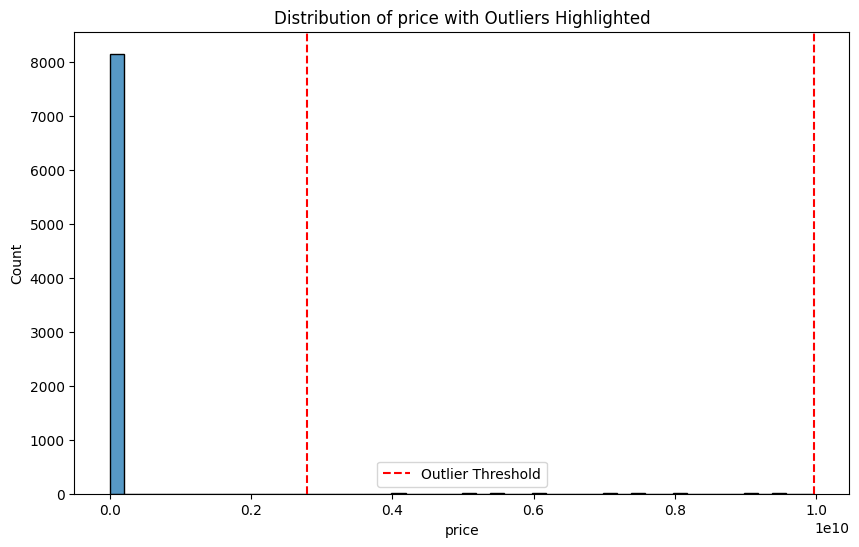

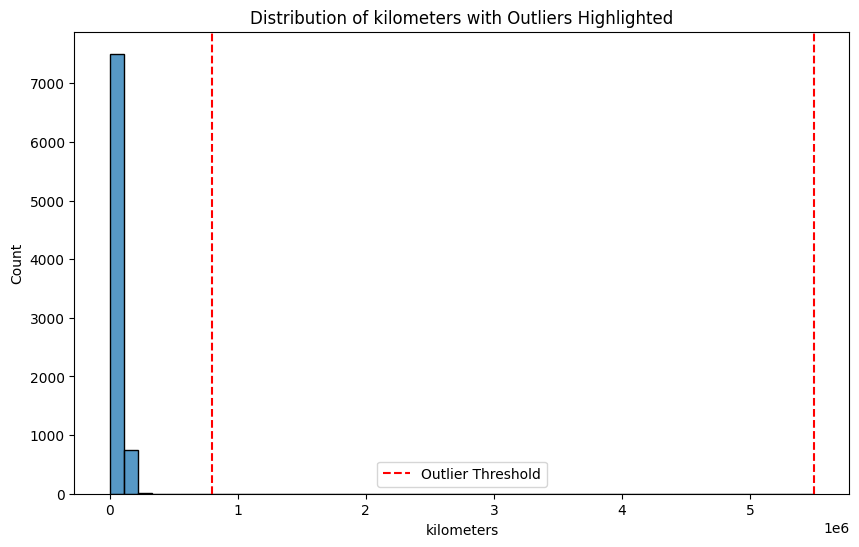

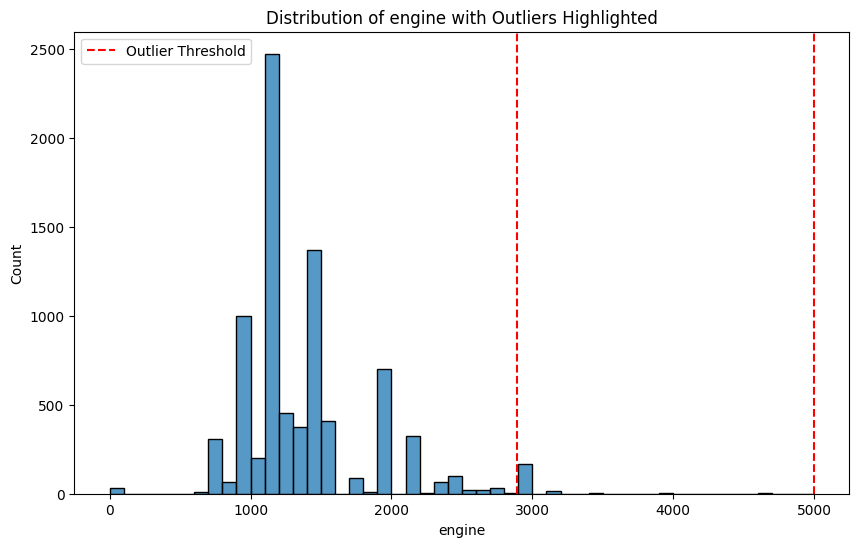

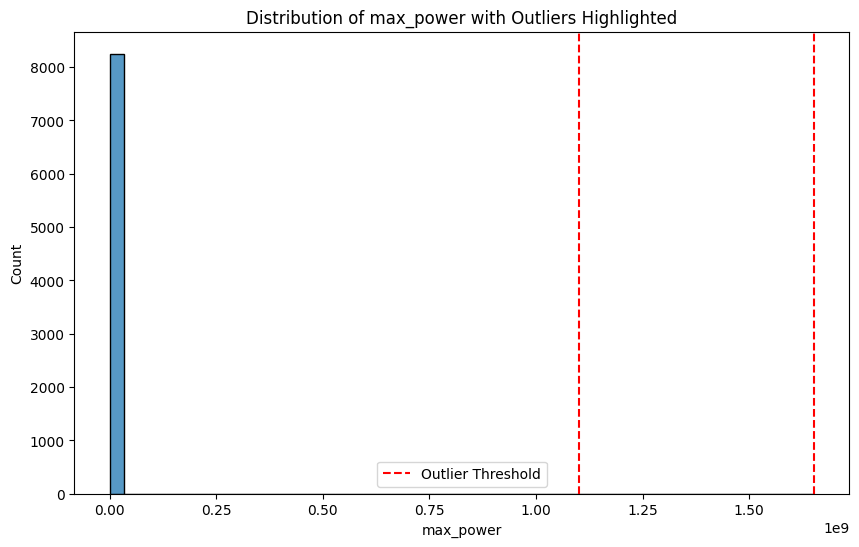

In [ ]:
from scipy import stats

def z_score_outliers(df_combined, threshold=3):
    z_scores = {}
    outlier_counts = {}
    numeric_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns
    
    # Print header
    print("\nOutlier Analysis using Z-score method (threshold = 3)")
    print("-" * 50)
    
    for col in numeric_columns:
        # Calculate z-scores
        z = np.abs(stats.zscore(df_combined[col]))
        
        # Find outliers
        outliers = df_combined[z > threshold][col]
        
        # Print summary for each column
        print(f"\nColumn: {col}")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Outlier values:")
            print(outliers.head())  # Show first 5 outliers
            print(f"Range of normal values: {df_combined[z <= threshold][col].min():.2f} to {df_combined[z <= threshold][col].max():.2f}")
            print(f"Range of outlier values: {outliers.min():.2f} to {outliers.max():.2f}")
    
    return

# Run the analysis
z_score_outliers(df_combined)

# Create summary DataFrame of outlier percentages
def get_outlier_summary(df_combined, threshold=3):
    summary = []
    numeric_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_columns:
        z = np.abs(stats.zscore(df_combined[col]))
        outlier_count = len(df_combined[z > threshold])
        outlier_percentage = (outlier_count / len(df_combined)) * 100
        
        summary.append({
            'Column': col,
            'Total_Records': len(df_combined),
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': round(outlier_percentage, 2)
        })
    
    summary_df = pd.DataFrame(summary)
    summary_df = summary_df.sort_values('Outlier_Percentage', ascending=False)
    return summary_df

# Print the summary
print("\nOutlier Summary:")
print(get_outlier_summary(df_combined))

# Visualization function
def plot_column_with_outliers(df_combined, column_name, threshold=3):
    z = np.abs(stats.zscore(df_combined[column_name]))
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_combined, x=column_name, bins=50)
    plt.title(f'Distribution of {column_name} with Outliers Highlighted')
    
    # Highlight outliers in red
    outliers = df_combined[z > threshold][column_name]
    if len(outliers) > 0:
        plt.axvline(x=outliers.min(), color='r', linestyle='--', label='Outlier Threshold')
        plt.axvline(x=outliers.max(), color='r', linestyle='--')
    
    plt.legend()
    plt.show()

# Example: Plot outliers for important columns
important_columns = ['price', 'kilometers', 'engine', 'max_power']
for col in important_columns:
    plot_column_with_outliers(df_combined, col)

Removing Outliers using Interquartile Range

In [81]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Handle outliers for critical features
critical_columns = ['mileage','price', 'engine']
for col in critical_columns:
    df_combined = handle_outliers(df_combined, col)

In [82]:
print(df_combined['mileage'].describe())

count    8259.000000
mean       18.900915
std         3.898792
min         9.900000
25%        16.800000
50%        18.900000
75%        21.400000
max        28.300000
Name: mileage, dtype: float64


In [83]:
zero_count_engine_cc = (df_combined['engine'] == 0).sum()
print(f"Number of zero values in the 'engine' column: {zero_count_engine_cc}")

Number of zero values in the 'engine' column: 0


In [190]:
df_new = df_combined.copy()
df_new

,city,mileage,engine,max_power,torque,seats,length,width,height,fuel_type,body_type,kilometers,transmission,owner_number,manufacturer,model,model_year,price,insurance_valid_till,wheel_size
0,bangalore,23.10,998.0,67.04,90.00,5.0,3715.0,1635.0,1565.0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,400000.0,Third Party,NaN
1,bangalore,17.00,1497.0,121.31,150.00,5.0,3998.0,1765.0,1647.0,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,811000.0,Comprehensive,16
2,bangalore,23.84,1199.0,84.00,114.00,5.0,3746.0,1647.0,1535.0,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,585000.0,Comprehensive,14
3,bangalore,19.10,1197.0,81.86,113.75,5.0,3995.0,1660.0,1520.0,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,Comprehensive,14
4,bangalore,23.65,1248.0,88.50,200.00,5.0,4300.0,1785.0,1595.0,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,Third Party,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,25.24,998.0,65.71,89.00,5.0,3695.0,1655.0,1555.0,Petrol,Hatchback,10000.0,Manual,1,Maruti,Maruti Celerio,2022,510000.0,Third Party,NaN
8365,Kolkata,22.74,796.0,47.30,69.00,5.0,3395.0,1490.0,1475.0,Petrol,Hatchback,120000.0,Manual,1,Maruti,Maruti Alto 800,2014,180000.0,Third Party,NaN
8366,Kolkata,11.74,1796.0,186.00,285.00,5.0,4591.0,1770.0,1447.0,Petrol,Sedan,50000.0,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000.0,Third Party,17
8367,Kolkata,18.50,1197.0,85.80,114.00,5.0,3775.0,1680.0,1620.0,Petrol,Hatchback,40000.0,Manual,1,Maruti,Maruti Ritz,2012,140000.0,Third Party,14


LABEL ENCODING

In [191]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df_new['city'] = l.fit_transform(df_new['city'])
print("\nFirst few rows of city encoding:")
print(df_new[['city']].head())


First few rows of city encoding:
   city
0     4
1     4
2     4
3     4
4     4


In [192]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df_new[ 'fuel_type']=l.fit_transform(df_new[ 'fuel_type'])
print("\nFirst few rows of fuel_type encoding:")
print(df_new[[ 'fuel_type']].head())


First few rows of fuel_type encoding:
   fuel_type
0          4
1          4
2          4
3          4
4          1


In [193]:
df_new['body_type']=l.fit_transform(df_new['body_type'])
print("\nFirst few rows of 'body_type' encoding:")
print(df_new[['body_type']].head())


First few rows of 'body_type' encoding:
   body_type
0          2
1          7
2          2
3          8
4          7


In [194]:
df_new[ 'transmission']=l.fit_transform(df_new[ 'transmission'])
print("\nFirst few rows of transmission encoding:")
print(df_new[[ 'transmission']].head())


First few rows of transmission encoding:
   transmission
0             1
1             1
2             1
3             1
4             1


In [195]:
df_new[ 'insurance_valid_till']=l.fit_transform(df_new[ 'insurance_valid_till'])
print("\nFirst few rows of insurance encoding:")
print(df_new[[ 'insurance_valid_till']].head())


First few rows of insurance encoding:
   insurance_valid_till
0                     4
1                     2
2                     2
3                     2
4                     4


Standard Scaling

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_df = df_new.drop('price', axis=1)  
price_series = df_new['price'].copy() 
features_scaled = scaler.fit_transform(features_df)
df_scaled = pd.DataFrame(features_scaled, columns=features_df.columns, index=features_df.index)

df_scaled['price'] = price_series

print("Scaled Data (with original price):")
print(df_scaled.head())

print("\nOriginal first 5 prices:")
print(df_new['price'].head())
print("\nScaled data first 5 prices:")
print(df_scaled['price'].head())


Scaled Data (with original price):
       city   mileage    engine  max_power    torque    seats  fuel_type  \
0  0.860064  1.077087 -1.110617  -0.022781 -0.032621 -0.30569   0.709129   
1  0.860064 -0.487595  0.378625  -0.022780 -0.032621 -0.30569   0.709129   
2  0.860064  1.266901 -0.510742  -0.022781 -0.032621 -0.30569   0.709129   
3  0.860064  0.051066 -0.516711  -0.022781 -0.032621 -0.30569   0.709129   
4  0.860064  1.218165 -0.364504  -0.022781 -0.032621 -0.30569  -1.385541   

   body_type  kilometers  transmission  owner_number  model_year  \
0  -1.100604    0.820047      0.618271      2.575042   -0.387864   
1   0.746709   -0.352861      0.618271      1.007699    0.379533   
2  -1.100604   -0.631758      0.618271     -0.559643    0.379533   
3   1.116172   -0.553223      0.618271     -0.559643   -0.643663   
4   0.746709    0.013870      0.618271     -0.559643   -0.387864   

   insurance_valid_till     price  
0              0.664168  400000.0  
1             -1.136082  81

In [198]:
 df_scaled

,city,mileage,engine,max_power,torque,seats,fuel_type,body_type,kilometers,transmission,owner_number,model_year,insurance_valid_till,price
0,0.860064,1.077087,-1.110617,-0.022781,-0.032621,-0.30569,0.709129,-1.100604,0.820047,0.618271,2.575042,-0.387864,0.664168,400000.0
1,0.860064,-0.487595,0.378625,-0.022780,-0.032621,-0.30569,0.709129,0.746709,-0.352861,0.618271,1.007699,0.379533,-1.136082,811000.0
2,0.860064,1.266901,-0.510742,-0.022781,-0.032621,-0.30569,0.709129,-1.100604,-0.631758,0.618271,-0.559643,0.379533,-1.136082,585000.0
3,0.860064,0.051066,-0.516711,-0.022781,-0.032621,-0.30569,0.709129,1.116172,-0.553223,0.618271,-0.559643,-0.643663,-1.136082,462000.0
4,0.860064,1.218165,-0.364504,-0.022781,-0.032621,-0.30569,-1.385541,0.746709,0.013870,0.618271,-0.559643,-0.387864,0.664168,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.287497,1.626009,-1.110617,-0.022781,-0.032621,-0.30569,0.709129,-1.100604,-0.657945,0.618271,-0.559643,1.402728,0.664168,510000.0
8365,0.287497,0.984745,-1.713477,-0.022782,-0.032621,-0.30569,0.709129,-1.100604,0.820047,0.618271,-0.559643,-0.643663,0.664168,180000.0
8366,0.287497,-1.836812,1.270977,-0.022778,-0.032621,-0.30569,0.709129,1.116172,-0.120493,-1.617413,2.575042,-1.411060,0.664168,550000.0
8367,0.287497,-0.102837,-0.516711,-0.022781,-0.032621,-0.30569,0.709129,-1.100604,-0.254856,0.618271,-0.559643,-1.155261,0.664168,140000.0


In [199]:
df_scaled['price'] = np.log1p(df_scaled['price'])

In [200]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8259 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  8259 non-null   float64
 1   mileage               8259 non-null   float64
 2   engine                8259 non-null   float64
 3   max_power             8259 non-null   float64
 4   torque                8259 non-null   float64
 5   seats                 8259 non-null   float64
 6   fuel_type             8259 non-null   float64
 7   body_type             8259 non-null   float64
 8   kilometers            8259 non-null   float64
 9   transmission          8259 non-null   float64
 10  owner_number          8259 non-null   float64
 11  model_year            8259 non-null   float64
 12  insurance_valid_till  8259 non-null   float64
 13  price                 8259 non-null   float64
dtypes: float64(14)
memory usage: 967.9 KB


Correlation Heatmaps

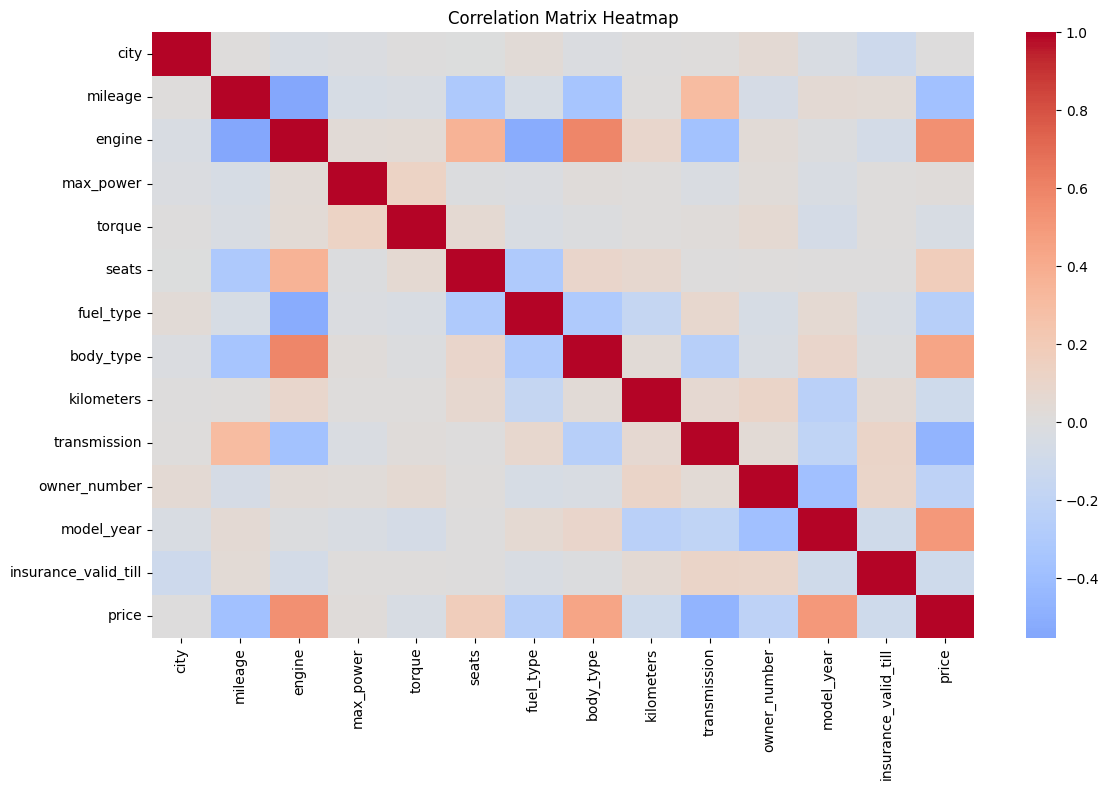


Top 10 Features Correlated with Price:
price                   1.000000
engine                  0.542477
model_year              0.507023
body_type               0.437213
seats                   0.177824
max_power               0.018048
city                    0.009054
torque                 -0.038173
kilometers             -0.100521
insurance_valid_till   -0.109450
Name: price, dtype: float64

Highly Correlated Feature Pairs (>0.7):


In [201]:
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Price:")
print(price_correlation[:10])

threshold = 0.7
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x,y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nHighly Correlated Feature Pairs (>0.7):")
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} -- {feat2}: {corr:.2f}")

FEATURE SELECTION

In [202]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = df_scaled.drop(columns=["price"])
y = df_scaled["price"]
test = SelectKBest(score_func=f_regression, k=10)
fit = test.fit(X, y)
print("Feature Scores:", fit.scores_)
print("P-values:", fit.pvalues_)
selected_features = X.columns[fit.get_support()]
print("Selected Features:", selected_features) 

Feature Scores: [6.76951849e-01 1.33537895e+03 3.44312864e+03 2.69045522e+00
 1.20496956e+01 2.69624570e+02 5.56078549e+02 1.95138758e+03
 8.42850677e+01 2.35425214e+03 3.82645749e+02 2.85714022e+03
 1.00112617e+02]
P-values: [4.10662084e-001 3.88429301e-271 0.00000000e+000 1.00989061e-001
 5.20658623e-004 1.20033655e-059 4.83137335e-119 0.00000000e+000
 5.33041898e-020 0.00000000e+000 2.49212698e-083 0.00000000e+000
 1.95713456e-023]
Selected Features: Index(['mileage', 'engine', 'seats', 'fuel_type', 'body_type', 'kilometers',
       'transmission', 'owner_number', 'model_year', 'insurance_valid_till'],
      dtype='object')


MODEL BUILDING
LINEAR REGRESSION

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


X = df_scaled.drop(columns=["price"])
y = df_scaled['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(x_train, y_train)


y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Printing the results
print(f"R2 score on training data: {r2_train}")
print(f"R2 score on test data: {r2_test}")
print(f"MSE on training data: {mse_train}")
print(f"MSE on test data: {mse_test}")
print(f"MAE on training data: {mae_train}")
print(f"MAE on test data: {mae_test}")

print(f"Intercept: {linear_model.intercept_}")
print(f"Coefficients: {linear_model.coef_}")

R2 score on training data: 0.6213374552903508
R2 score on test data: 0.5878934832456703
MSE on training data: 0.16933734207218118
MSE on test data: 0.19380668536945883
MAE on training data: 0.2605120537997228
MAE on test data: 0.2749328320078962
Intercept: 13.344411209557212
Coefficients: [ 0.03053572 -0.10796964  0.20538681  0.00734536 -0.01963545 -0.01484263
 -0.06699444  0.05432091 -0.01060661 -0.12253308 -0.03265291  0.3101497
 -0.00657493]


RIDGE REGULARIZATION

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the dataset
X = df_scaled.drop(columns=["price"])  
y = df_scaled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Ridge regression model
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

# Predicting on test data
y_test_pred = ridge.predict(X_test)

# Calculating metrics
ridge_r2 = ridge.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Printing the results
print("Ridge Test R²:", ridge_r2)
print("Ridge Test MSE:", mse_test)
print("Ridge Test MAE:", mae_test)

Ridge Test R²: 0.5878971428533535
Ridge Test MSE: 0.19380496431821118
Ridge Test MAE: 0.2749432498539371


In [205]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the dataset
X = df_scaled.drop(columns=["price"]) 
y = df_scaled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up GridSearchCV for Ridge regression
alpha_values = [0.01, 0.1, 1, 10, 100]
ridge = Ridge()
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# Fitting the model with the best alpha
grid_search.fit(X_train, y_train)

# Best alpha and score
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

# Using the best model to predict on the test set
best_ridge = grid_search.best_estimator_
y_test_pred = best_ridge.predict(X_test)

# Calculating MSE and MAE
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Printing the results
print("Best Alpha:", best_alpha)
print("Best Cross-Validated R²:", best_r2)
print("Test MSE:", mse_test)
print("Test MAE:", mae_test)

Best Alpha: 0.01
Best Cross-Validated R²: 0.6150429109892397
Test MSE: 0.19380666811283673
Test MAE: 0.27493293621712706


LASSO REGULARIZATION

In [206]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Splitting the dataset
X = df_scaled.drop(columns=["price"])  
y = df_scaled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the range for alpha values
alphas = np.logspace(-4, 0, 50)

# LassoCV model
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Getting the optimal alpha
optimal_alpha = lasso_cv.alpha_
print("Optimal Alpha:", optimal_alpha)

# Predicting on test data
y_pred = lasso_cv.predict(X_test)

# Calculating R², MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the results
print("Lasso Test R²:", r2)
print("Lasso Test MSE:", mse)
print("Lasso Test MAE:", mae)

Optimal Alpha: 0.007543120063354615
Lasso Test R²: 0.5887761581830342
Lasso Test MSE: 0.19339157835970688
Lasso Test MAE: 0.27642280914586453


DecisionTreeRegressor

In [207]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = df_scaled.drop(columns=["price"])   
y = df_scaled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4, random_state=42)
dt.fit(X_train, y_train)

# Predicting on training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Calculating R², MSE, and MAE
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Printing the results
print("Decision Tree R² on Training Data:", r2_train)
print("Decision Tree R² on Test Data:", r2_test)
print("Decision Tree MSE on Test Data:", mse_test)
print("Decision Tree MAE on Test Data:", mae_test)

Decision Tree R² on Training Data: 0.8495419716240042
Decision Tree R² on Test Data: 0.7694928021295847
Decision Tree MSE on Test Data: 0.10840361449488728
Decision Tree MAE on Test Data: 0.1895317258570925


RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


X = df_scaled.drop(columns=["price"])  
y = df_scaled["price"]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


rf = RandomForestRegressor(max_features='sqrt')
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
y_pred_test = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("\nRandom Forest Test Results:")
print("R² on Test Data:", r2_test)
print("MSE on Test Data:", mse_test)
print("MAE on Test Data:", mae_test)

print("\nRandom Forest Training Results:")
print("R² on Training Data:", r2_train)
print("MSE on Training Data:", mse_train)
print("MAE on Training Data:", mae_train)


Random Forest Test Results:
R² on Test Data: 0.8047192892470173
MSE on Test Data: 0.09183719676578007
MAE on Test Data: 0.16196715839559117

Random Forest Training Results:
R² on Training Data: 0.9757188565385685
MSE on Training Data: 0.010858492221312539
MAE on Training Data: 0.05638519600156751


GradientBoostingRegressor

In [209]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the dataset
X = df_scaled.drop(columns=["price"])   
y = df_scaled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'learning_rate': [0.1, 0.05, 0.03],  
    'n_estimators': [50, 100, 150],  
    'max_depth': [3, 4, 5],           
    'subsample': [0.8, 0.9, 1.0]     
}


gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_

y_pred_train = best_gb_model.predict(X_train)
y_pred_test = best_gb_model.predict(X_test)


r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


print("Gradient Boosting R² on Training Data:", r2_train)
print("Gradient Boosting R² on Test Data:", r2_test)
print("Gradient Boosting MSE on Test Data:", mse_test)
print("Gradient Boosting MAE on Test Data:", mae_test)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}
Gradient Boosting R² on Training Data: 0.9365896147253905
Gradient Boosting R² on Test Data: 0.7977570269215393
Gradient Boosting MSE on Test Data: 0.09511143031734004
Gradient Boosting MAE on Test Data: 0.16042621839537322


#XGBoost

In [210]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=["price"])  
y = df_scaled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 250],
    'max_depth': [3, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)


best_xgb = grid_search.best_estimator_


y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


print("XGBoost R² on Training Data:", r2_train)
print("XGBoost R² on Test Data:", r2_test)
print("XGBoost MSE on Test Data:", mse_test)
print("XGBoost MAE on Test Data:", mae_test) 

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
XGBoost R² on Training Data: 0.9630139436482843
XGBoost R² on Test Data: 0.7962110842025136
XGBoost MSE on Test Data: 0.09583846088338188
XGBoost MAE on Test Data: 0.15357719475680157


MODEL COMPARISON

In [3]:

# Create a dictionary to store model performance
model_performance = {
    "Model": [
        "Linear Regression", 
        "Ridge Regression", 
        "Lasso Regression", 
        "Decision Tree", 
        "Random Forest", 
        "Gradient Boosting", 
        "XGBoost"
    ],
    "R² (Test)": [0.5879, 0.6150, 0.5888, 0.7695, 0.8047, 0.7978, 0.7962],
    "MSE (Test)": [0.1938, 0.1938, 0.1934, 0.1084, 0.0918, 0.0951, 0.0958],
    "MAE (Test)": [0.2749, 0.2749, 0.2764, 0.1895, 0.1620, 0.1604, 0.1536],
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display as a table
print(performance_df)


               Model  R² (Test)  MSE (Test)  MAE (Test)
0  Linear Regression     0.5879      0.1938      0.2749
1   Ridge Regression     0.6150      0.1938      0.2749
2   Lasso Regression     0.5888      0.1934      0.2764
3      Decision Tree     0.7695      0.1084      0.1895
4      Random Forest     0.8047      0.0918      0.1620
5  Gradient Boosting     0.7978      0.0951      0.1604
6            XGBoost     0.7962      0.0958      0.1536


The Random Forest model is the best overall choice due to its:

Highest R² on Test Data (0.8047): Indicates it explains the most variance on unseen data.
Lowest Test MSE (0.0918): Captures prediction error effectively.
Low Test MAE (0.1620): Ensures accurate predictions

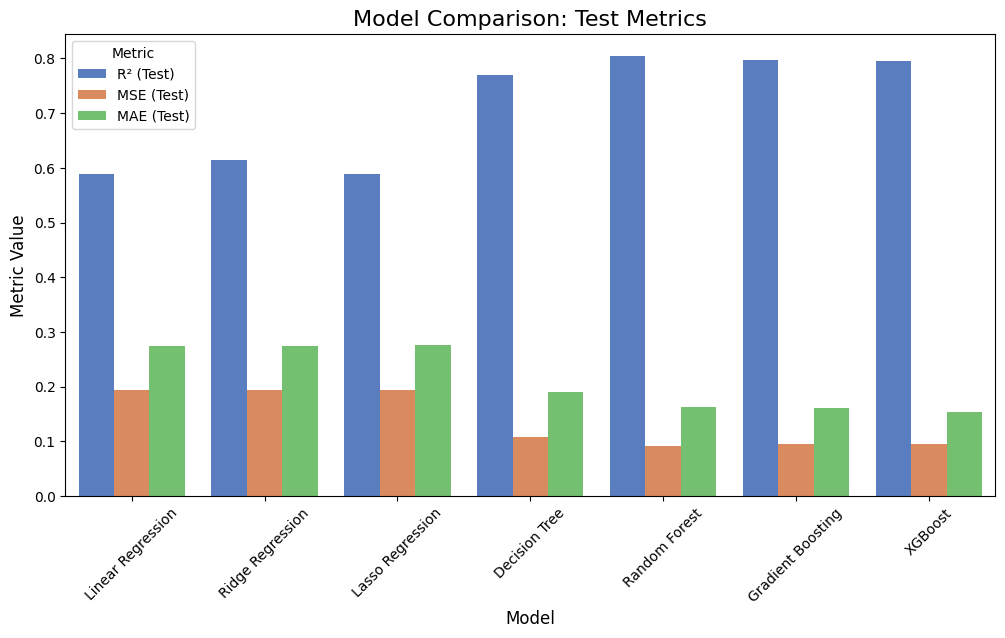

In [5]:
# Melt the DataFrame for easy plotting with seaborn
melted_df = performance_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Model", y="Value", hue="Metric", palette="muted")
plt.title("Model Comparison: Test Metrics", fontsize=16)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()


In [211]:
import joblib


joblib.dump(best_rf, 'random_forest_model.pkl')



['random_forest_model.pkl']